In [266]:
%matplotlib inline
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)


Importo il dataset e visualizzo i dati al suo interno

In [267]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/Loan_Default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Elimino Colonne ID e Year perchè sono inutili 

In [268]:
inutili=['ID','year']

data=data.drop(inutili,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

Scelgo come target la colonna 'Status' e visualizzo la frequenza per ogni suo possibile valore

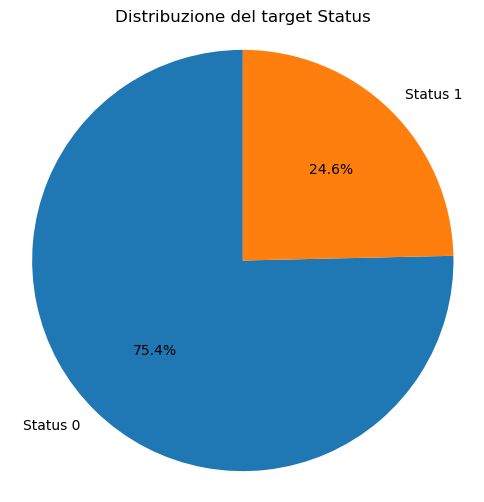

In [269]:
count_status = data['Status'].value_counts()

# Creo il grafico a torta
plt.figure(figsize=(6, 6))  #Dimensioni grafico
plt.pie(count_status, labels=['Status 0', 'Status 1'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione del target Status')  
plt.axis('equal')  # Assicura che il grafico sia un cerchio


plt.show()

Visualizzo i dati non numerici per vedere i possibili valori e la loro frequenza

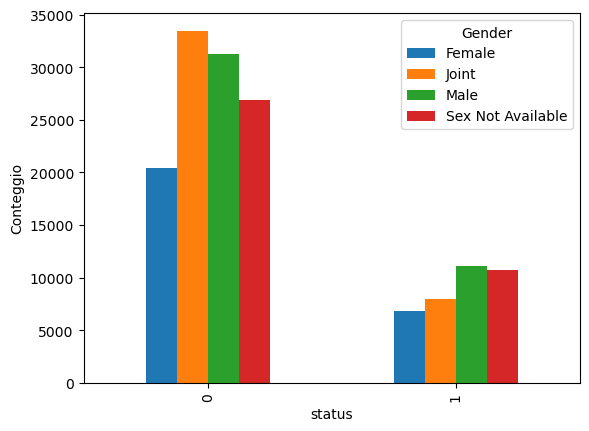

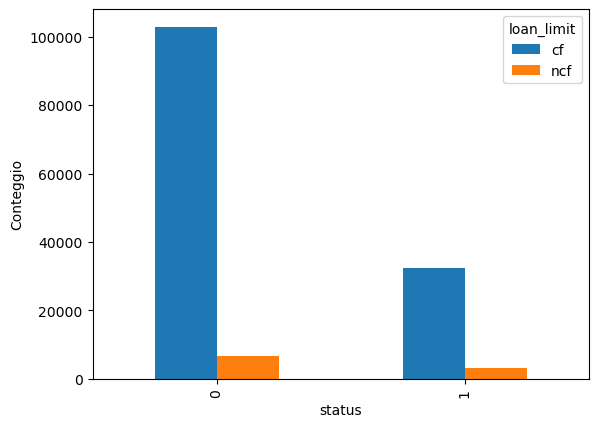

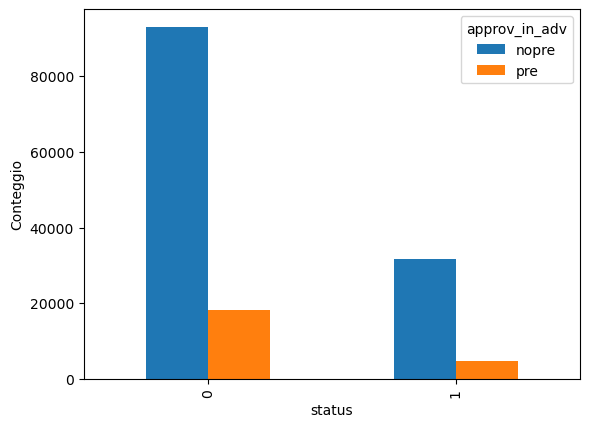

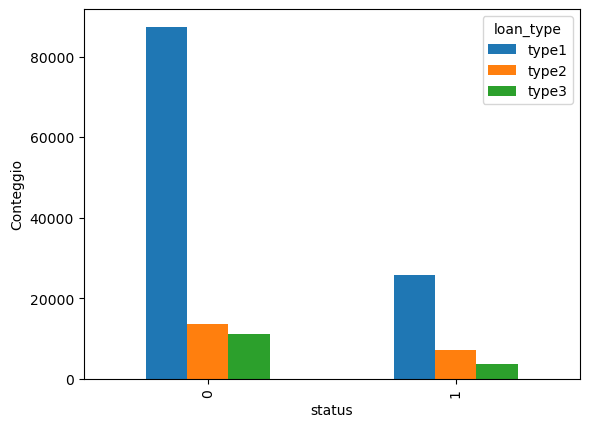

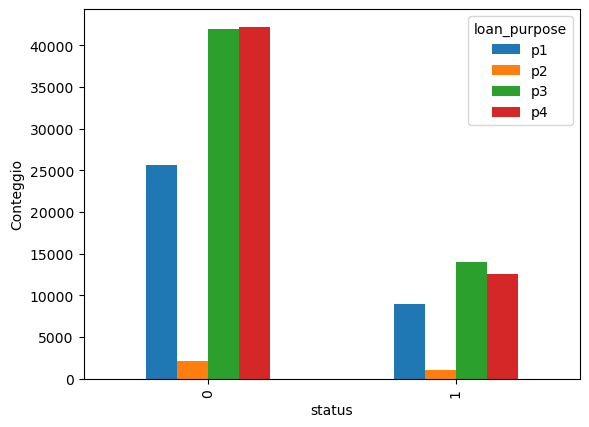

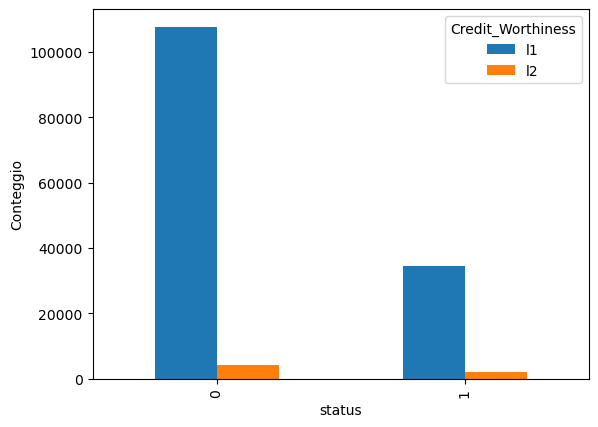

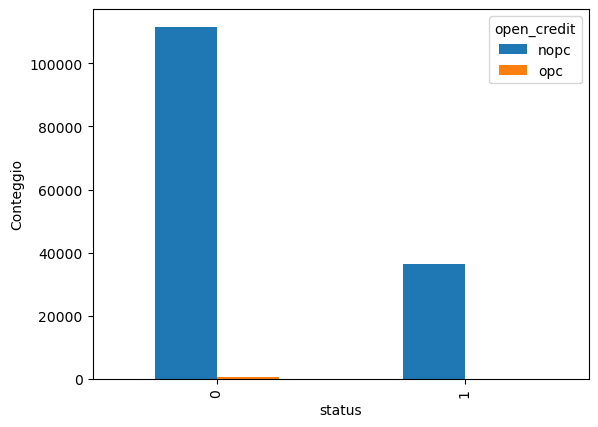

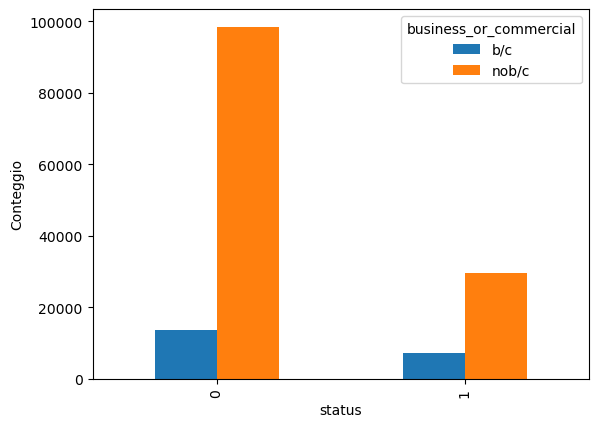

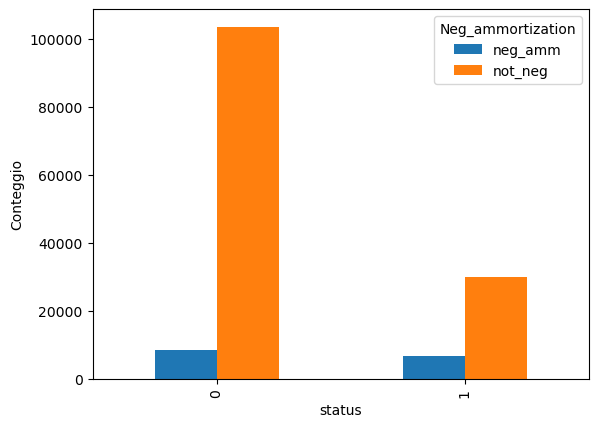

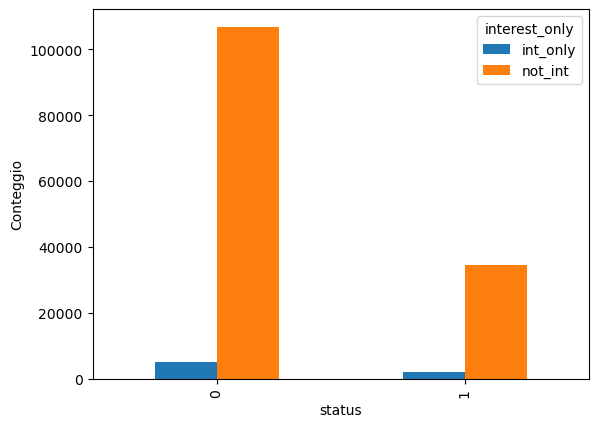

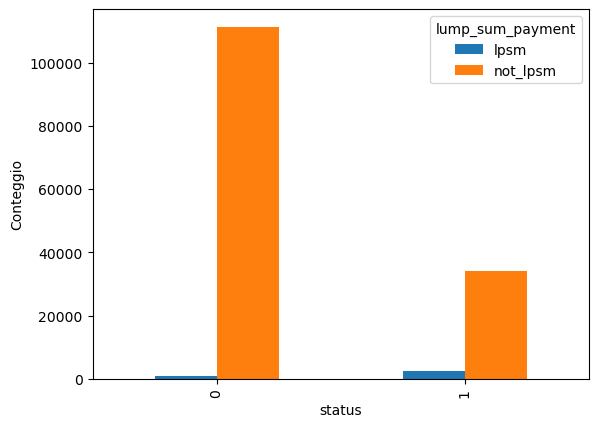

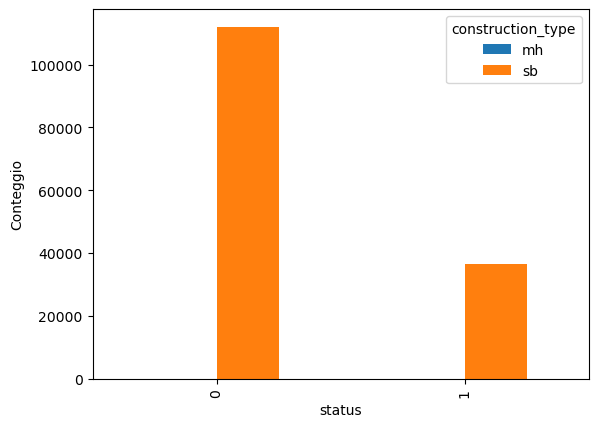

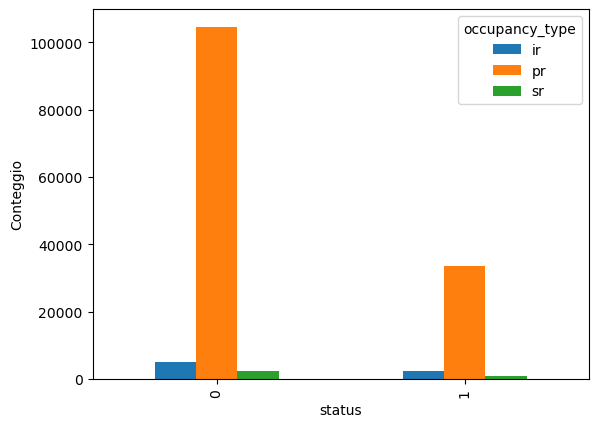

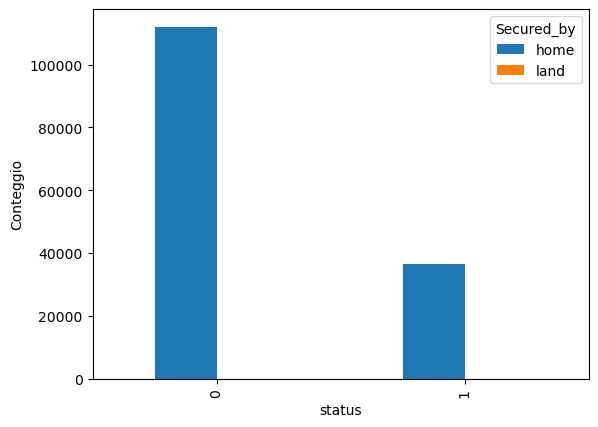

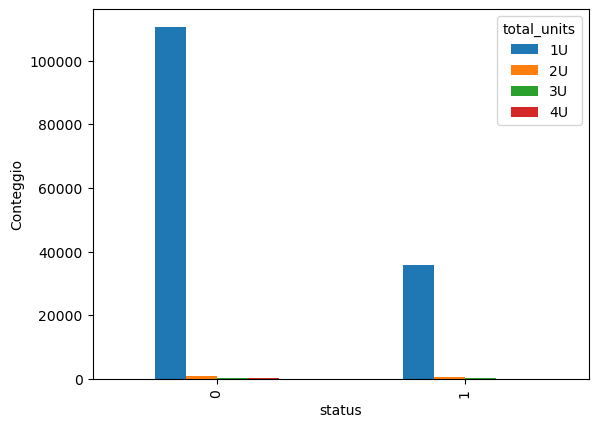

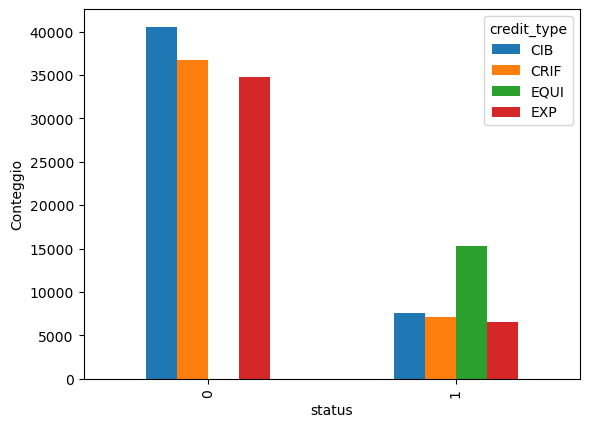

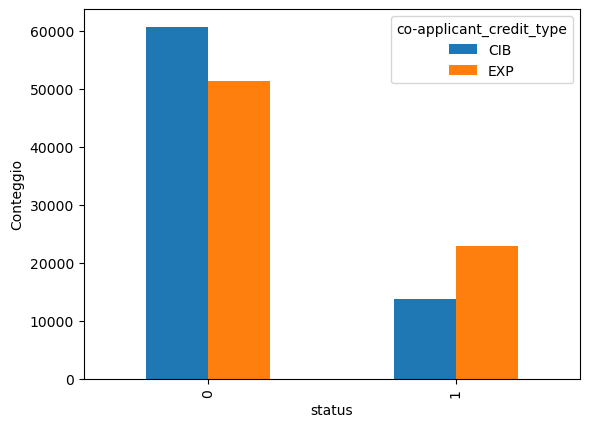

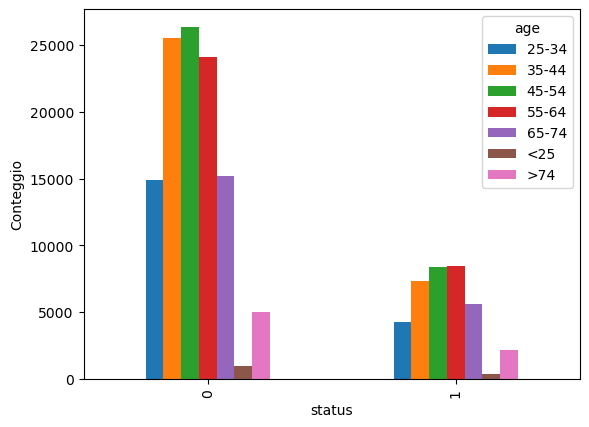

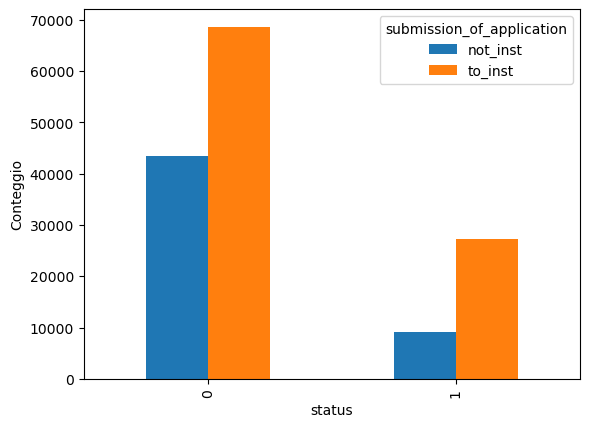

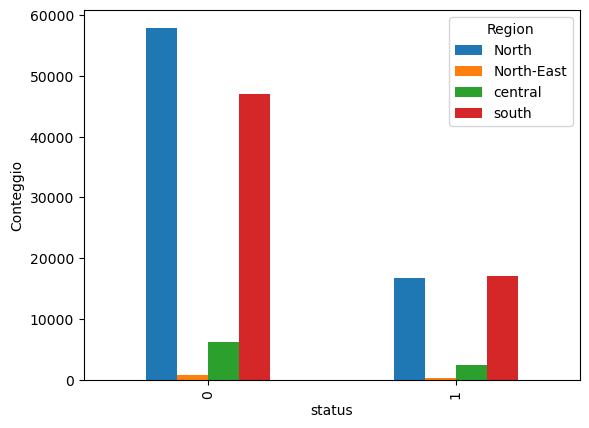

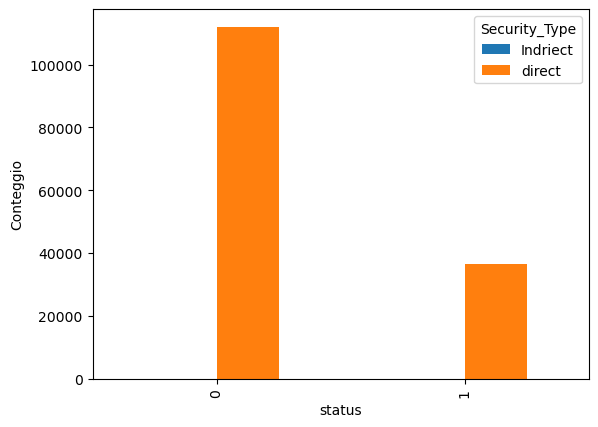

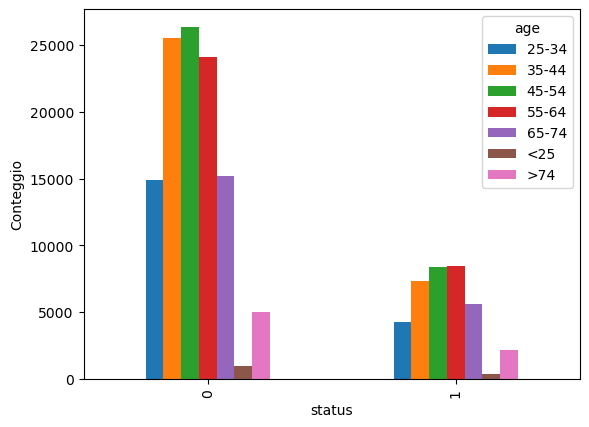

In [270]:
label_data=["Gender","loan_limit","approv_in_adv","loan_type","loan_purpose","Credit_Worthiness","open_credit","business_or_commercial",
             "Neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by","total_units",
             "credit_type","co-applicant_credit_type","age","submission_of_application","Region","Security_Type","age"]

for col in label_data:
    fig, ax = plt.subplots()
    counts = data.groupby(['Status', col]).size().unstack()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('status')
    ax.set_ylabel('Conteggio')
    # ax.set_title(f'Bar plot of {col} by satisfaction')
    # plt.savefig(f"visualization_{col}.png")
    plt.show()

Anche se alcuni valori sono poco frequenti servono a determinare i casi in cui avviene il default

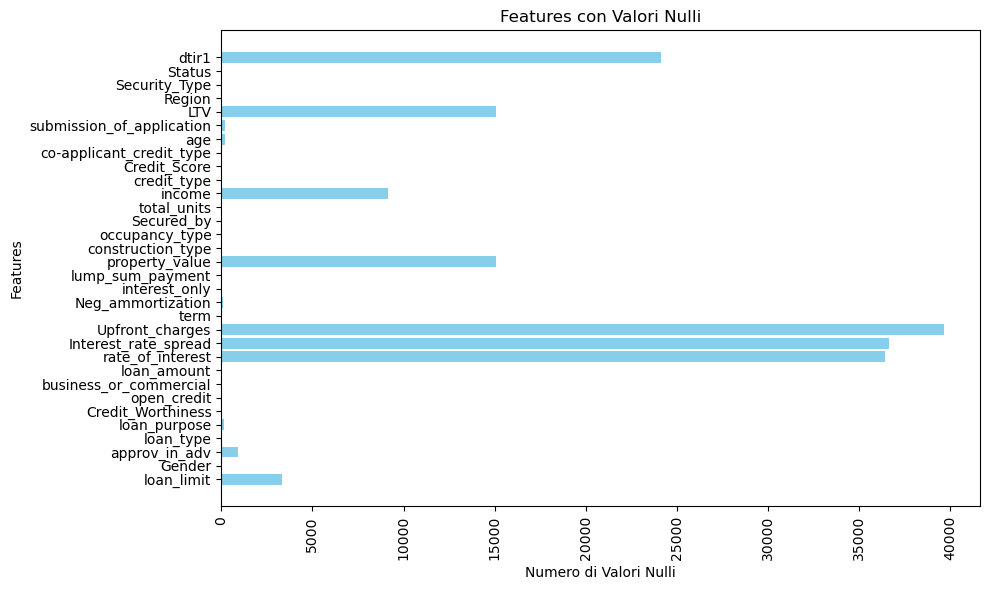

In [271]:
null_counts = data.isnull().sum()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(null_counts.index, null_counts.values, color='skyblue')
plt.yticks(range(len(null_counts.index)), null_counts.index) 
plt.ylabel('Features')
plt.xlabel('Numero di Valori Nulli')
plt.title('Features con Valori Nulli')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità

# Mostra il grafico
plt.tight_layout()

In [272]:
from sklearn.impute import SimpleImputer

colonne=['LTV','income','property_value','Upfront_charges','Interest_rate_spread','rate_of_interest','approv_in_adv','loan_limit','loan_purpose','term','Neg_ammortization','age','submission_of_application','dtir1']
imputer = SimpleImputer(strategy='most_frequent') 

data[colonne]=imputer.fit_transform(data[colonne])

data.isnull().sum()


loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

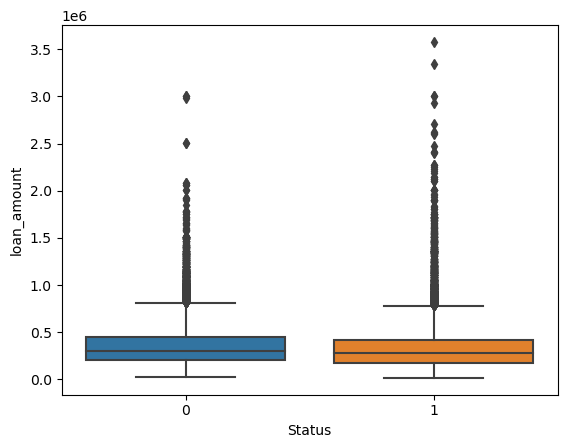

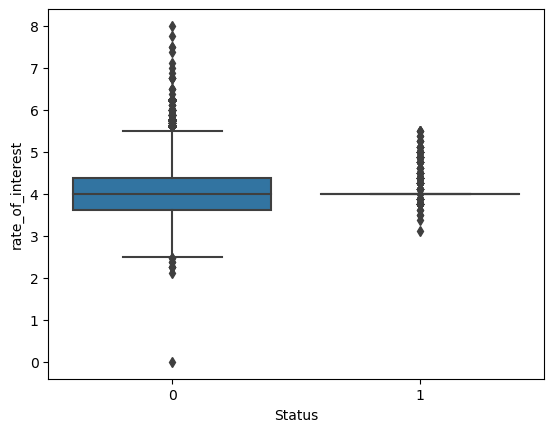

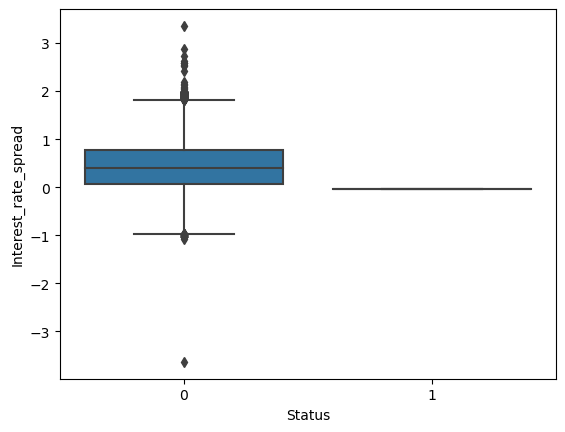

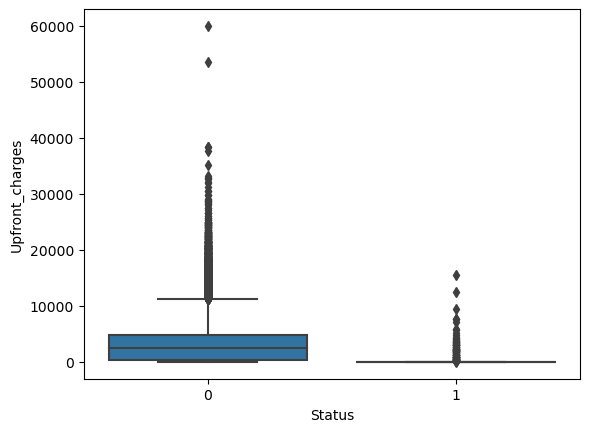

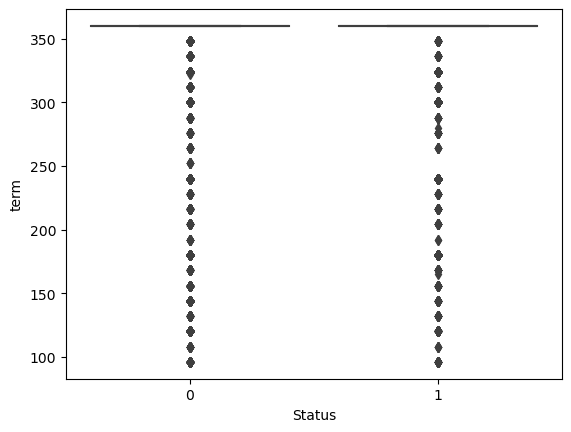

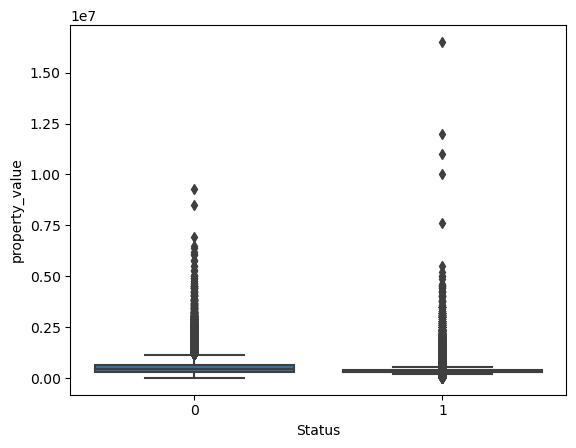

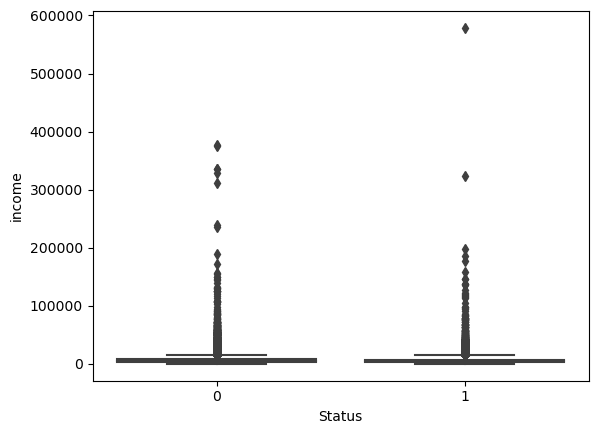

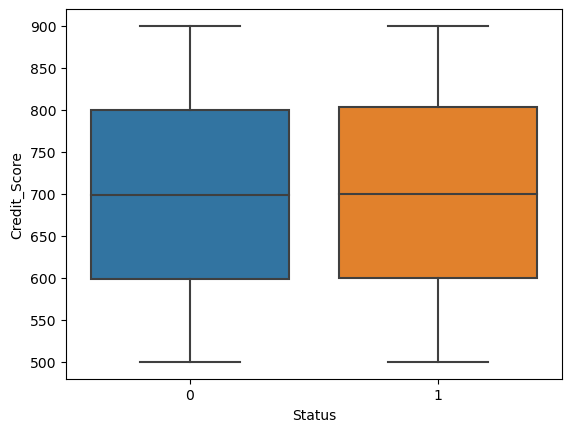

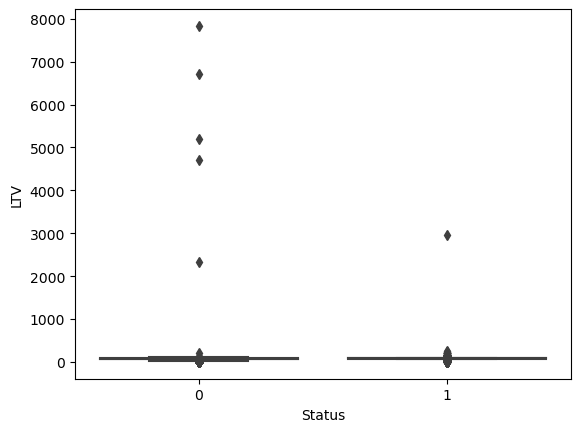

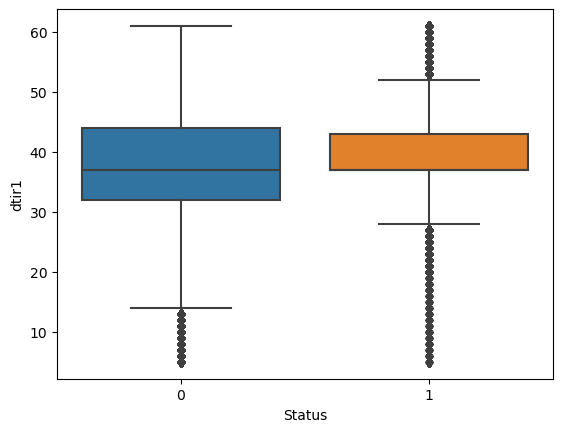

In [273]:
numerical_features=['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','Credit_Score',
                     'LTV','dtir1']

for feature in numerical_features:
    plt.figsize=(16,6)
    sns.boxplot(x='Status', y=feature, data=data)
    plt.show()


Outliers in loan_amount:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
108           ncf              Joint           pre     type1           p1   
137           ncf               Male         nopre     type1           p3   
227           ncf  Sex Not Available         nopre     type1           p3   
264            cf               Male           pre     type1           p1   
330           ncf  Sex Not Available           pre     type1           p1   
...           ...                ...           ...       ...          ...   
148296        ncf              Joint         nopre     type1           p4   
148349        ncf              Joint         nopre     type1           p4   
148469        ncf               Male           pre     type1           p1   
148526        ncf              Joint         nopre     type1           p4   
148578        ncf              Joint         nopre     type1           p3   

       Credit_Worthiness open_credit business_or_c

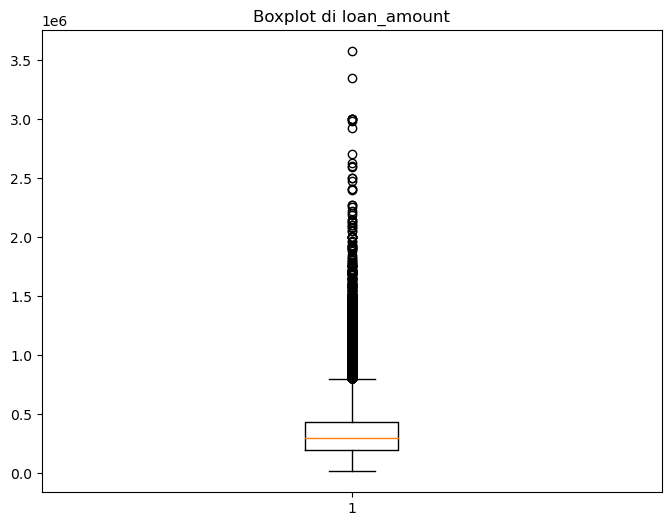

Outliers in rate_of_interest:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
584            cf              Joint         nopre     type3           p3   
850            cf             Female         nopre     type1           p3   
997            cf  Sex Not Available         nopre     type1           p3   
1006           cf  Sex Not Available         nopre     type1           p3   
1102           cf  Sex Not Available         nopre     type1           p1   
...           ...                ...           ...       ...          ...   
148098        ncf              Joint         nopre     type1           p1   
148325         cf               Male         nopre     type1           p3   
148484         cf              Joint         nopre     type1           p4   
148624         cf  Sex Not Available         nopre     type1           p3   
148655         cf              Joint         nopre     type1           p3   

       Credit_Worthiness open_credit business

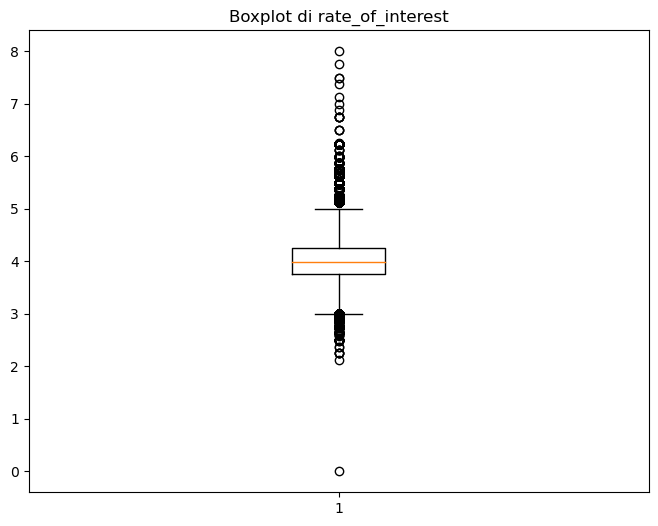

Outliers in Interest_rate_spread:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
133            cf             Female         nopre     type2           p1   
155            cf  Sex Not Available         nopre     type2           p3   
307            cf              Joint         nopre     type2           p1   
457            cf              Joint           pre     type2           p1   
979            cf               Male         nopre     type2           p3   
...           ...                ...           ...       ...          ...   
147656         cf              Joint         nopre     type2           p1   
147742        ncf               Male         nopre     type2           p3   
147796         cf               Male           pre     type2           p1   
148503         cf  Sex Not Available         nopre     type2           p3   
148527         cf              Joint         nopre     type2           p1   

       Credit_Worthiness open_credit busi

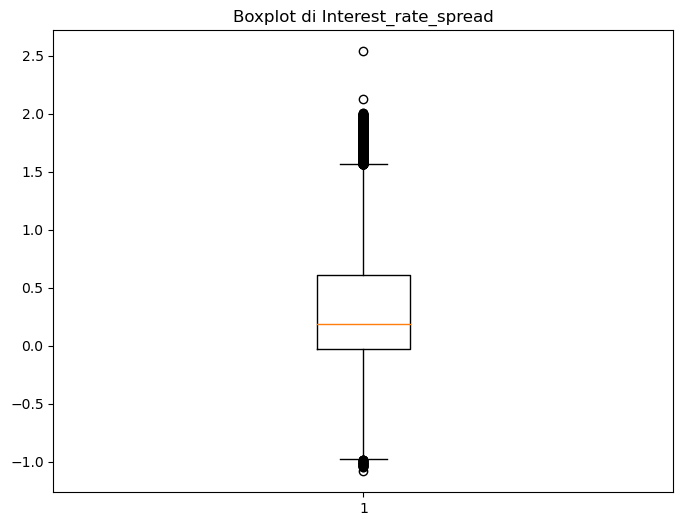

Outliers in Upfront_charges:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
37             cf              Joint         nopre     type1           p4   
46             cf  Sex Not Available         nopre     type2           p3   
54             cf              Joint         nopre     type1           p1   
98            ncf  Sex Not Available           pre     type1           p1   
165            cf             Female         nopre     type1           p4   
...           ...                ...           ...       ...          ...   
148448         cf              Joint         nopre     type1           p3   
148547         cf  Sex Not Available           pre     type1           p3   
148582         cf              Joint         nopre     type1           p3   
148584         cf              Joint         nopre     type1           p3   
148608         cf              Joint           pre     type1           p2   

       Credit_Worthiness open_credit business_

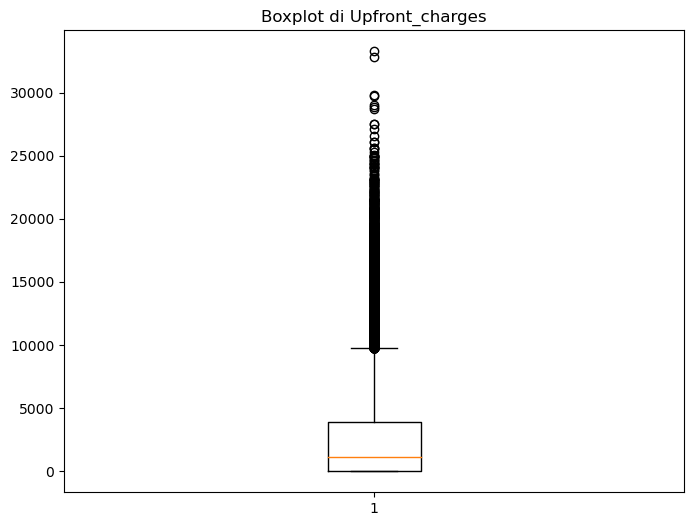

Outliers in term:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
58            ncf               Male           pre     type1           p3   
128            cf              Joint         nopre     type1           p3   
285            cf  Sex Not Available         nopre     type1           p4   
394            cf  Sex Not Available         nopre     type1           p4   
406            cf              Joint         nopre     type1           p3   
...           ...                ...           ...       ...          ...   
148363         cf               Male         nopre     type1           p4   
148365         cf  Sex Not Available           pre     type1           p4   
148493         cf               Male         nopre     type1           p3   
148537         cf  Sex Not Available         nopre     type1           p4   
148638        ncf              Joint           pre     type1           p3   

       Credit_Worthiness open_credit business_or_commerci

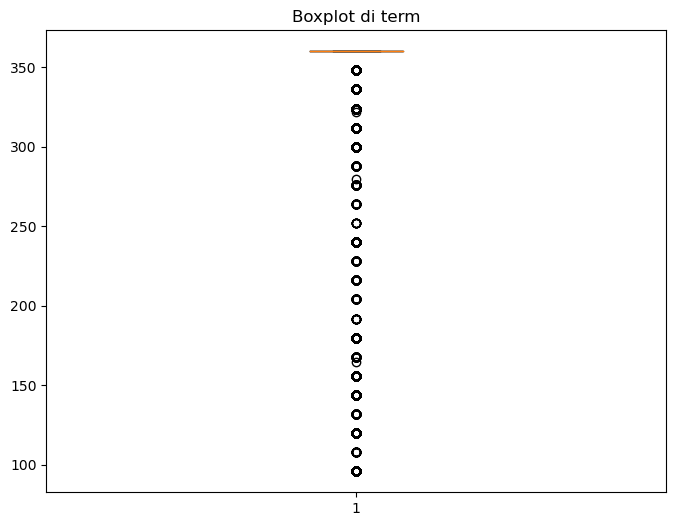

Outliers in property_value:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
44            ncf  Sex Not Available         nopre     type1           p4   
89             cf              Joint         nopre     type1           p3   
91             cf              Joint         nopre     type1           p3   
291            cf               Male           pre     type1           p3   
356           ncf              Joint         nopre     type1           p3   
...           ...                ...           ...       ...          ...   
148446         cf              Joint         nopre     type1           p4   
148576         cf             Female         nopre     type1           p4   
148577         cf  Sex Not Available         nopre     type1           p3   
148600         cf               Male         nopre     type1           p4   
148639         cf  Sex Not Available         nopre     type2           p3   

       Credit_Worthiness open_credit business_o

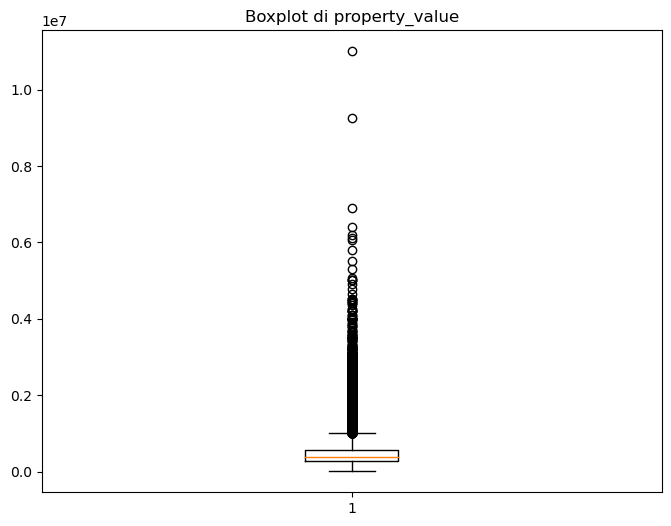

Outliers in income:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
144            cf              Joint         nopre     type1           p3   
163            cf              Joint         nopre     type1           p4   
185            cf  Sex Not Available           pre     type1           p1   
295            cf              Joint         nopre     type1           p4   
392            cf  Sex Not Available         nopre     type1           p1   
...           ...                ...           ...       ...          ...   
147774         cf  Sex Not Available         nopre     type1           p4   
147921         cf               Male         nopre     type1           p4   
148082         cf              Joint         nopre     type1           p4   
148274         cf               Male         nopre     type1           p4   
148498         cf              Joint         nopre     type1           p1   

       Credit_Worthiness open_credit business_or_commer

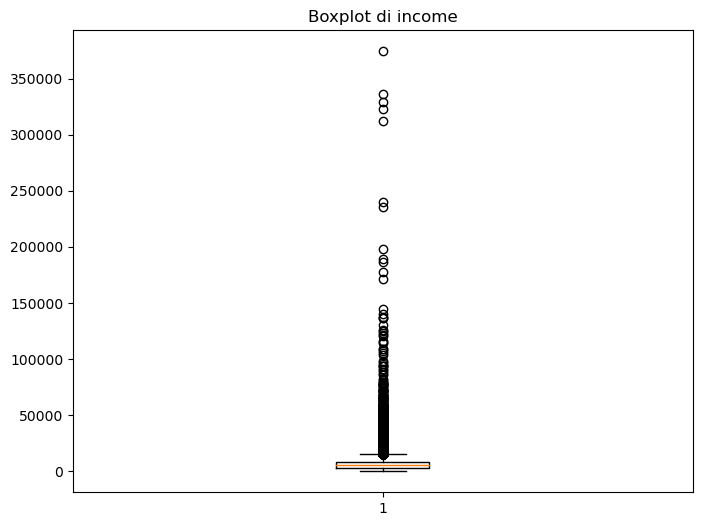

Outliers in Credit_Score:
Empty DataFrame
Columns: [loan_limit, Gender, approv_in_adv, loan_type, loan_purpose, Credit_Worthiness, open_credit, business_or_commercial, loan_amount, rate_of_interest, Interest_rate_spread, Upfront_charges, term, Neg_ammortization, interest_only, lump_sum_payment, property_value, construction_type, occupancy_type, Secured_by, total_units, income, credit_type, Credit_Score, co-applicant_credit_type, age, submission_of_application, LTV, Region, Security_Type, Status, dtir1]
Index: []


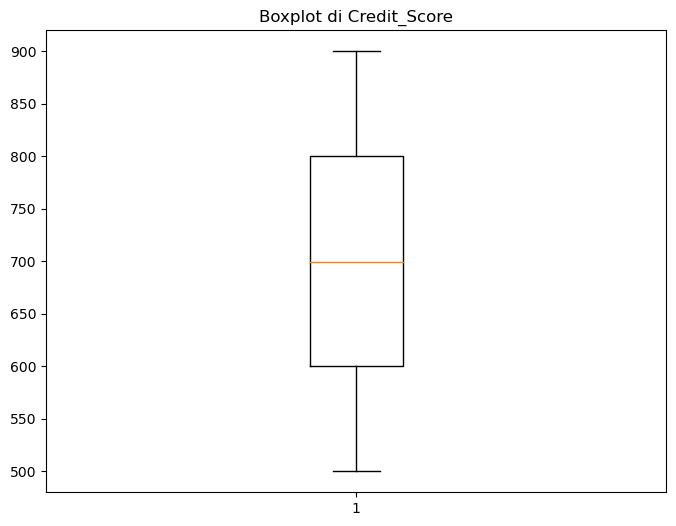

Outliers in LTV:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
3578           cf  Sex Not Available         nopre     type3           p3   
16951         ncf              Joint         nopre     type2           p4   
27473          cf  Sex Not Available         nopre     type2           p4   
30837          cf             Female         nopre     type2           p3   
36502          cf               Male         nopre     type2           p4   
40617          cf               Male         nopre     type2           p4   
43348          cf  Sex Not Available         nopre     type2           p3   
46287          cf              Joint         nopre     type2           p4   
47807          cf              Joint         nopre     type2           p4   
51248          cf             Female         nopre     type2           p2   
55286          cf              Joint         nopre     type2           p4   
65238          cf              Joint         nopre     type

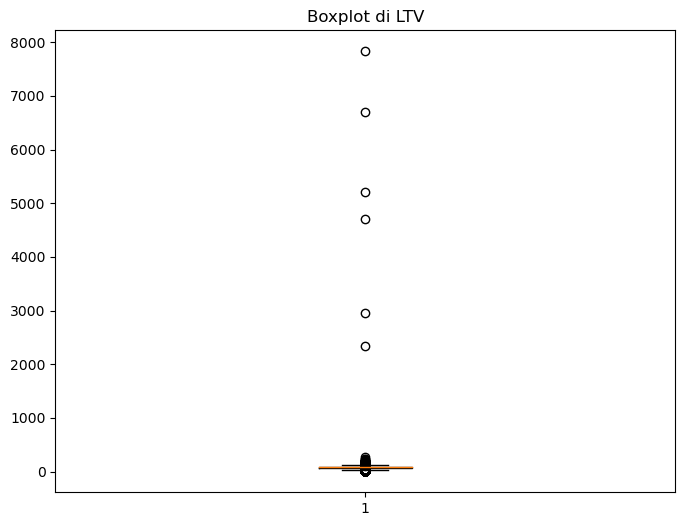

Outliers in dtir1:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
20             cf              Joint         nopre     type1           p3   
126            cf               Male         nopre     type1           p4   
208            cf               Male         nopre     type1           p4   
217            cf              Joint         nopre     type1           p3   
686            cf             Female         nopre     type1           p3   
...           ...                ...           ...       ...          ...   
148173         cf               Male         nopre     type1           p3   
148307         cf  Sex Not Available           pre     type1           p1   
148351         cf               Male         nopre     type1           p3   
148514         cf  Sex Not Available         nopre     type1           p3   
148533         cf             Female         nopre     type1           p3   

       Credit_Worthiness open_credit business_or_commerc

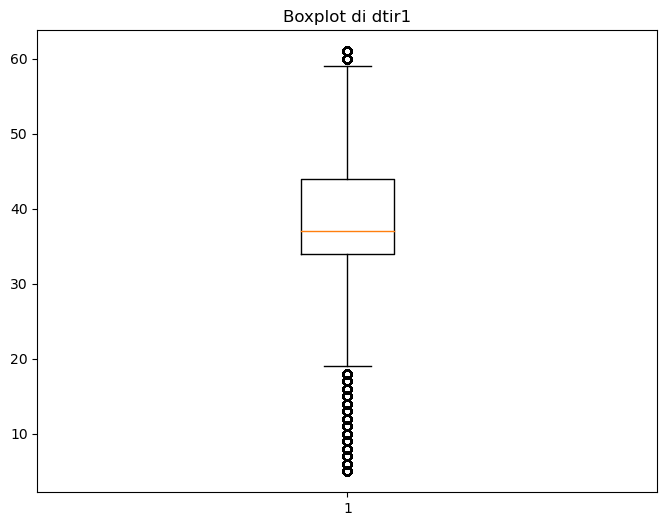

In [274]:
for feature in numerical_features:
    # Calcola la media e la deviazione standard della feature
    mean_value = data[feature].mean()
    std_value = data[feature].std()
    
    # Definisci una soglia per gli outliers (ad esempio, 2 o 3 deviazioni standard dalla media)
    threshold = 3 * std_value  
    
    # Individua gli outliers
    outliers = data[(data[feature] > mean_value + threshold) | (data[feature] < mean_value - threshold)]
    
    # Puoi stampare o salvare gli outliers se desideri
    print(f"Outliers in {feature}:")
    print(outliers)
    
  
    
    # Crea un boxplot per visualizzare la distribuzione della feature e gli outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[feature])
    plt.title(f'Boxplot di {feature}')
    plt.show()
    
    data=data.drop(outliers.index)

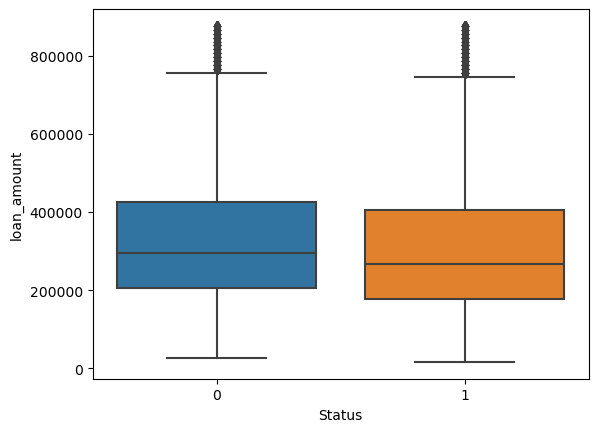

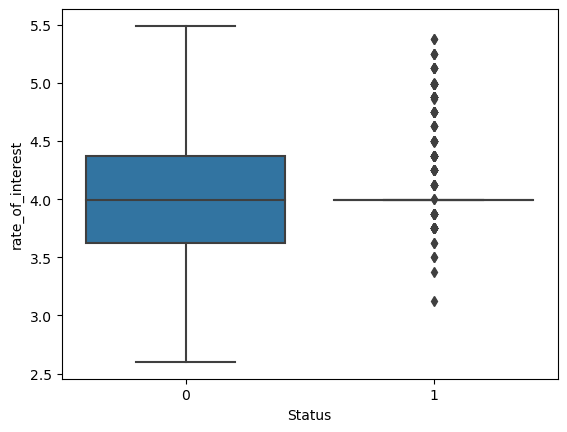

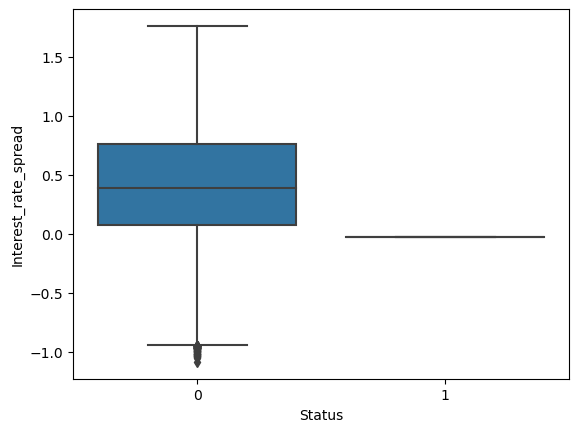

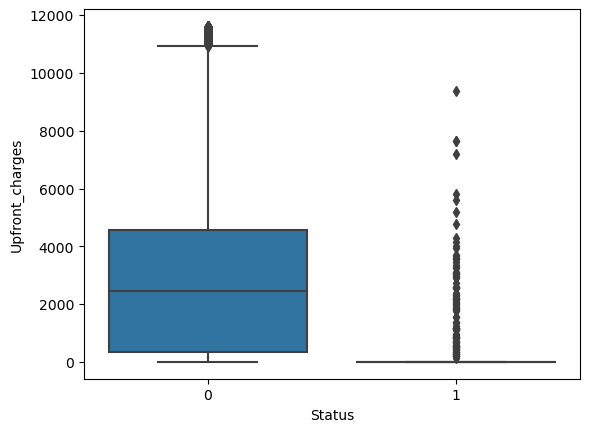

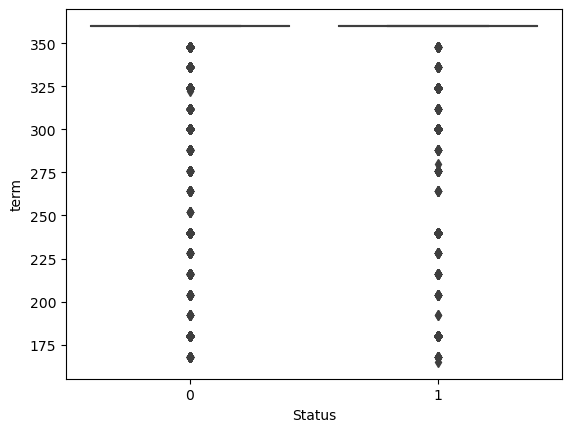

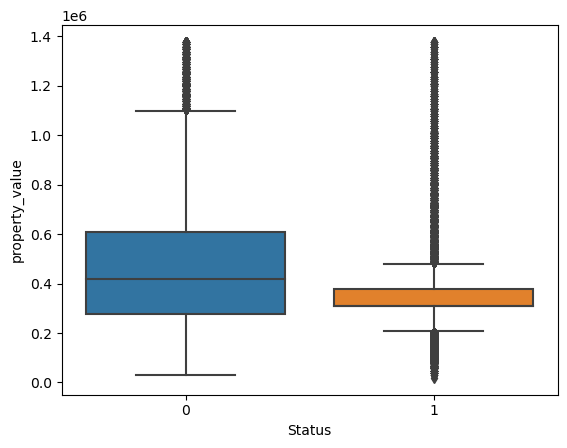

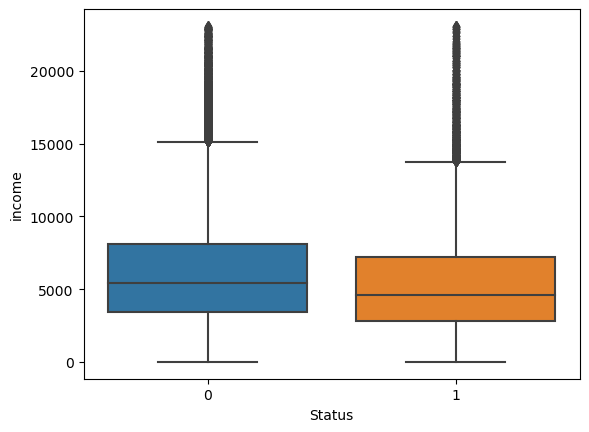

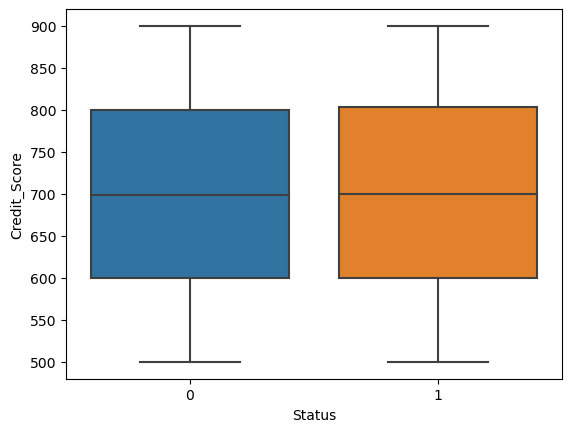

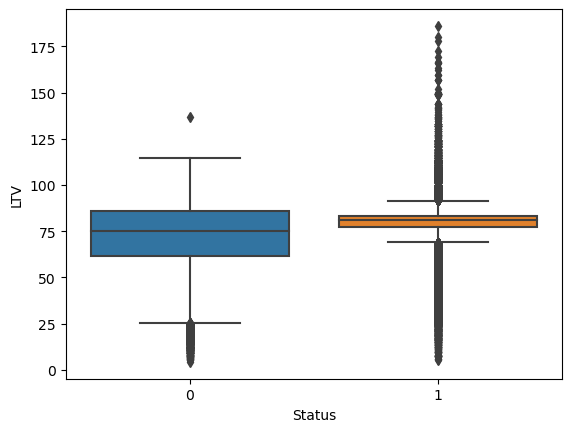

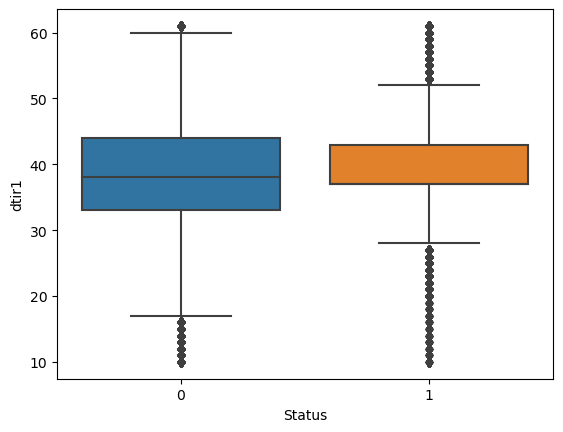

In [275]:
numerical_features=['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','Credit_Score',
                     'LTV','dtir1']

for feature in numerical_features:
    plt.figsize=(16,6)
    sns.boxplot(x='Status', y=feature, data=data)
    plt.show()

In [276]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import os

encoder = OrdinalEncoder(dtype=np.int16)
data[label_data] = encoder.fit_transform(data[label_data])

In [277]:
#eliminabili=['Interest_rate_spread','rate_of_interest','Upfront_charges','term','LTV']
#data=data.drop(eliminabili,axis=1)


In [278]:
data.to_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/dataset_clean.csv', index=False)

In [279]:
dataset=data.drop('Status',axis=1)
y=data['Status']

x_train, x_test, y_train, y_test = train_test_split(dataset, y, train_size=0.8)

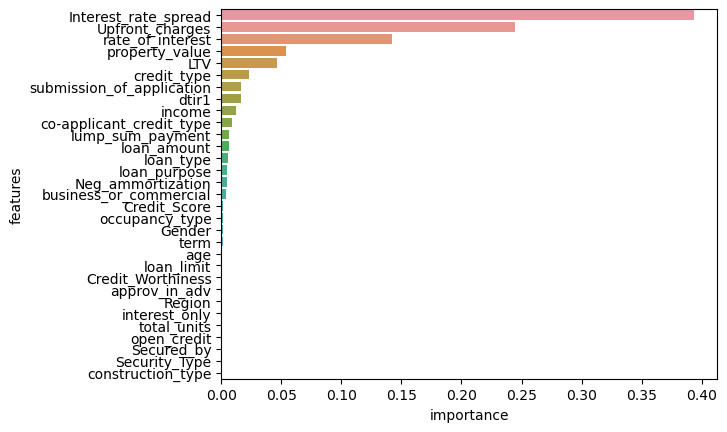

In [280]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=50,n_jobs=-1)
rf.fit(x_train, y_train)

feature_importance = pd.DataFrame(data={
    "features": dataset.columns,
    "importance": rf.feature_importances_
})
feature_importance.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(data=feature_importance,x='importance',y='features')
plt.savefig("feature importance.png",dpi=400,bbox_inches="tight")

<AxesSubplot:>

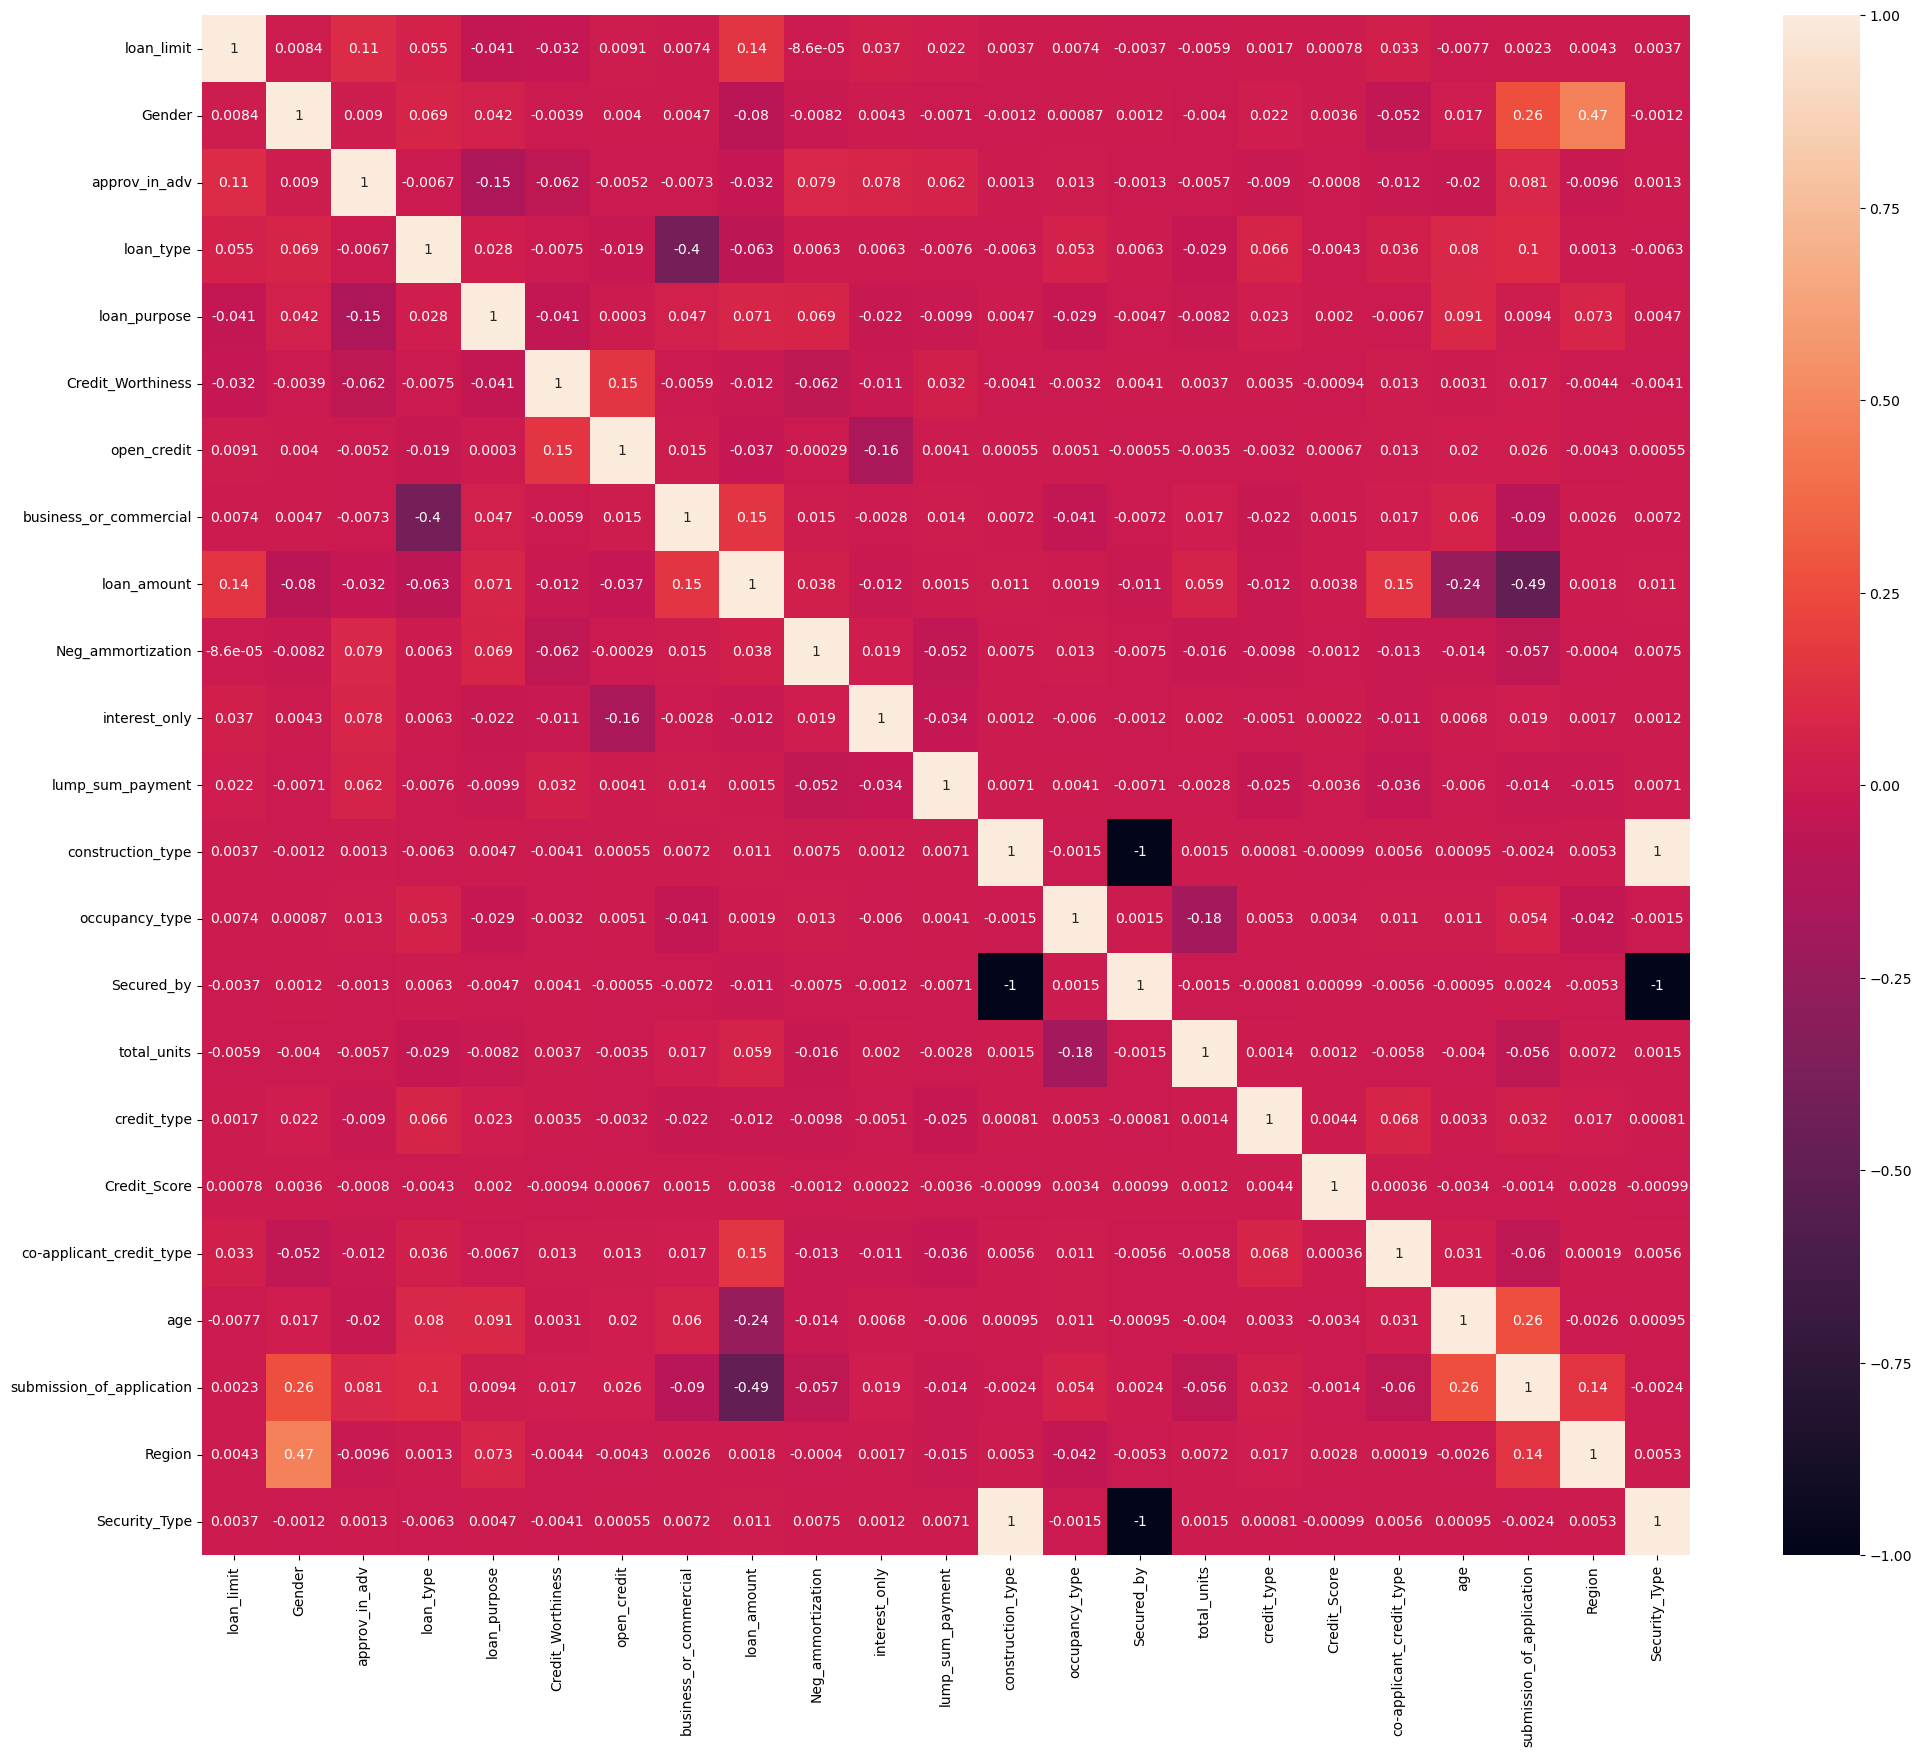

In [281]:
fig, ax = plt.subplots(figsize=(24,20))
sns.heatmap(dataset.corr(), annot=True, ax=ax)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


Text(0.5, 1.0, 'Average score: 0.9999176360529702')

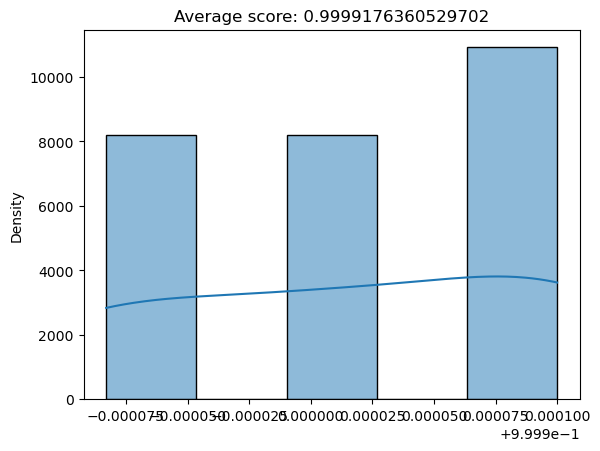

In [282]:
features_inutili=['term','loan_limit','Region','approv_in_adv','Credit_Worthiness','total_units','interest_only','Secured_by','construction_type','Security_Type','open_credit']

train_data=x_train.drop(features_inutili,axis=1)
test_data=x_test.drop(features_inutili,axis=1)

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='log_loss', min_samples_split=4,random_state=42)
tree_clf.fit(train_data, y_train)

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    tree_clf, train_data, y_train, cv=10, scoring="accuracy", verbose=1, n_jobs=-1
)
sns.histplot(cv_scores, kde=True, stat="density")
plt.title("Average score: {}".format(np.mean(cv_scores)))

In [283]:
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(train_data, y_train)

tree_clf.score(test_data, y_test)

0.9999633954390718

In [284]:
y_train.value_counts()

0    81610
1    27663
Name: Status, dtype: int64